# Astronomy Data Analysis

In [289]:
import pandas as pds
import numpy as np
import matplotlib.pyplot as plt

Here we pull our data frame from https://www.astro.keele.ac.uk/jkt/debcat/debs.dat and sort it by splitting columns by the space between them (df).  We then tweak the data frame by removing the '#' in "# System" so now each column has its intended values (ndf).  ndf is then displayed below.

In [290]:
df = pds.read_csv('https://www.astro.keele.ac.uk/jkt/debcat/debs.dat', delimiter = '\s+')
ndf = df.shift(1, axis=1)
ndf = ndf.drop(['#'], axis = 1)

In [291]:
ndf

,System,SpT1,SpT2,P(d),V,B-V,log(M1),error,log(M2),error.1,...,log(Teff1),err,log(Teff2),err.1,log(L1),error.6,log(L2),error.7,[M/H],error.8
0,EPIC_203710387,M4.5V,M5V,2.809,14.30,1.80,-0.9363,0.0116,-0.9763,0.0111,...,3.483,0.011,3.483,0.011,-1.842,0.047,-1.861,0.047,-9.99,-9.99
1,NGTS_J052218.2-250710.4,M5_V,M5_V,1.748,16.88,1.49,-0.7597,0.0032,-0.7590,0.0032,...,3.476,0.014,3.477,0.012,-9.990,-9.990,-9.990,-9.990,-9.99,-9.99
2,CM_Dra,M4.5_V,M4.5_V,1.268,12.90,1.60,-0.6364,0.0017,-0.6694,0.0018,...,3.496,0.010,3.494,0.014,-2.258,0.038,-2.313,0.056,-0.30,0.12
3,UScoCTIO_5,M4.5_V,M4.5_V,34.001,16.19,1.62,-0.4694,0.0026,-0.4864,0.0027,...,3.515,0.013,3.513,0.013,-1.105,0.053,-1.146,0.059,-9.99,-9.99
4,LSPM_J1112+7626,M4_V,none,41.033,14.85,1.49,-0.4038,0.0025,-0.5615,0.0019,...,3.486,0.024,3.470,0.023,-1.920,0.080,-2.210,0.090,-9.99,-9.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Y_Cyg,O9.8_V,O9.8_V,2.996,7.32,-0.09,1.2485,0.0086,1.2487,0.0073,...,4.521,0.003,4.525,0.003,-9.990,-9.990,-9.990,-9.990,0.00,0.00
265,DN_Cas,O8_V,B0.2_V,2.311,9.93,0.53,1.2797,0.0016,1.1377,0.0016,...,4.507,0.014,4.447,0.017,4.700,0.060,4.270,0.080,-9.99,-9.99
266,EM_Car,O8_V,O8_V,3.414,8.38,-0.31,1.3596,0.0061,1.3310,0.0067,...,4.531,0.026,4.531,0.026,5.020,0.100,4.920,0.100,-9.99,-9.99
267,V467_Vel,O6_Vf,B1_V,2.753,10.90,0.00,1.4031,0.0120,0.9165,0.0090,...,4.559,0.031,4.402,0.046,5.187,0.126,3.649,0.110,-9.99,-9.99


We now want to make a graph using ndf using $ L=A\sigma T^4 $ where L is luminosity, A is the area of the star, $\sigma$ is the Stephan-Boltzmann constant, and T is the temperature. This equation can then be manipulated into a $ y=mx+b $ form: <br><br>
$ \log{L}=\log{A\sigma T^4} $ <br> 
$ \log{L}=\log{T^4}+\log{A\sigma } $ <br>
$ \log{L}=4\log{T}+\log{A\sigma } $ <br><br> 
This shows this graph of log{L} vs. log{T} should have a slope of 4. <br><br>
We now filter out the unknown values which are marked as -9.99 and procede to make a scatter plot of Star 1 and 2. This plot is shown below.

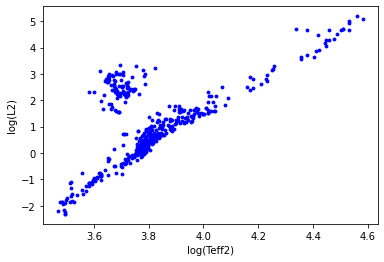

In [292]:
ndf = ndf[ndf["log(Teff1)"] != -9.99]
ndf = ndf[ndf["log(Teff2)"] != -9.99]
ndf = ndf[ndf["log(L1)"] != -9.99]
ndf = ndf[ndf["log(L2)"] != -9.99]
ax = ndf.plot.scatter(x="log(Teff1)", y="log(L1)", color="blue", s=8)
LvT = ndf.plot.scatter(x="log(Teff2)", y="log(L2)", color="blue", s=8, ax=ax)

Within this plot we can see a "cloud" of data points that does not follow the linear fit we expect.

We would like to find a way to cluster the data to show what points are apart of the cloud.

From the sklearn library we tested a couple different algorithms which we hypothesized would give us the clustering we wanted: Gaussian Mixture clustering and K-Means clustering.

First though, we needed to turn the data we graphed above into an array which we could pass into our algroithm as can be seen below.

In [293]:
X1 = np.array((ndf["log(Teff1)"], ndf["log(L1)"])).T
X2 = np.array((ndf["log(Teff2)"], ndf["log(L2)"])).T
X = np.concatenate((X1,X2), axis=0)

Now we can test our two algorithms:

In [294]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from matplotlib import pyplot

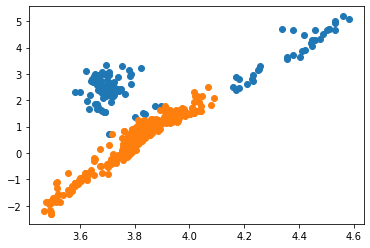

In [295]:
# gaussian mixture clustering

# define the model
model = GaussianMixture(n_components=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

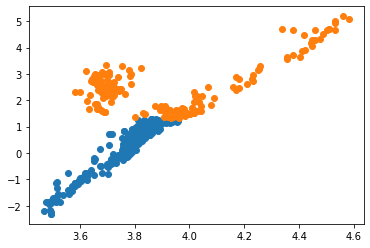

In [296]:
#k-means clustering

# define the model
model = KMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

As we can see neither of these algorithms give us clustering we desire.

We hypothesize that this is because of the discontinuities in the data.

To test this hypothesis we first cut off our data at x=4.1 (where we have larger and more discontinuities) and run our algorithm again.

In [297]:
# take data of X only < 4.1
Z = X[X[:,0] < 4.1]

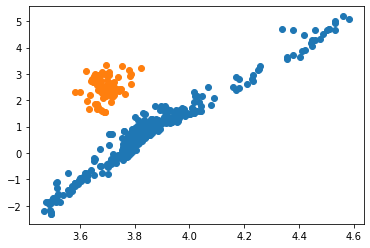

In [298]:
# gaussian mixture clustering with cut data

# define the model
model = GaussianMixture(n_components=2)
# fit the model to Z
model.fit(Z)
# assign a cluster to each example with all the data (X)
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

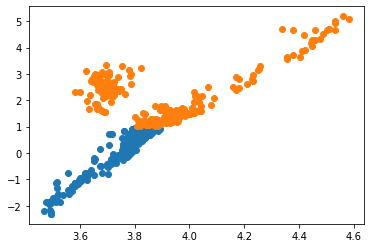

In [299]:
#k-means clustering with Z

# define the model
model = KMeans(n_clusters=2)
# fit the model with Z
model.fit(Z)
# assign a cluster to each example with all the data (X)
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

As we can see, fitting (training) the model with this subset of data, and then using it to predit the clusters for all of the data was not sucessful; but was using Gaussian Mixture clustering.

To prove this algorithm would be able to work if we had more data that removed these discontinuities we will add random points that follow the linear trend and then run our algorithms again.

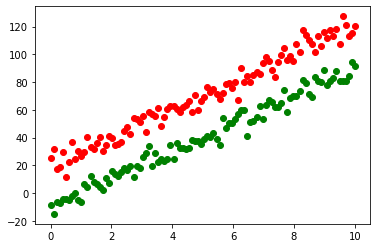

In [300]:
import random

def y(x, m, b):
    return m*x + b

xVal = np.linspace(0, 10, 100)
y_above = [y(x, 10, 5) + abs(random.gauss(15,5)) for x in xVal]
y_below = [y(x, 10, 5) - abs(random.gauss(15,5)) for x in xVal]
plt.scatter(xVal, y_below, c='g')
plt.scatter(xVal, y_above, c='r')
plt.show()


In [307]:
W1 = np.array((xVal, y_above)).T
W2 = np.array((xVal, y_below)).T
tempW = np.concatenate((W1,W2), axis=0)
W = np.concatenate((tempW,X), axis=0)

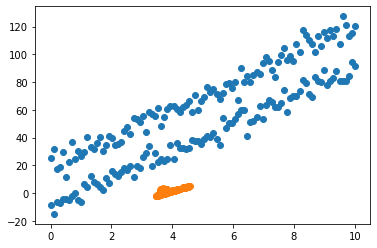

In [311]:
# gaussian mixture clustering with added data

# define the model
model = GaussianMixture(n_components=2)
# fit the model to W
model.fit(W)
# assign a cluster to each example with W
yhat = model.predict(W)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(W[row_ix, 0], W[row_ix, 1])
# show the plot
pyplot.show()

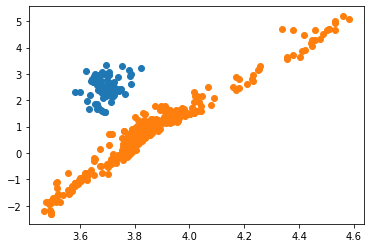

In [302]:
# gaussian mixture clustering

# define dataset
#X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

#print(np.array((ndf["log(Teff1)"],ndf["log(L1)"])).T)

# create a np.zeros(X.shape[0])

# define the model

# iterate model 100 times
# start for loop here for iterations

model = GaussianMixture(n_components=2)
# fit the model

# define Z as a random set of X by fixed %

#model.fit(X)
model.fit(Z)
# assign a cluster to each example
yhat = model.predict(X)

# add yhat to my array of zeros
# for loop ends here after iterations
# divide array of zeros by the amount of iterations done
# round array to make it an array full of 0's and 1's (this is new yhat used in plotting)



# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()